In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm, tqdm_notebook, trange

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree, DistanceMetric
from sklearn.metrics import accuracy_score

import warnings
warnings.simplefilter('ignore')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

from matplotlib.ticker import MaxNLocator

In [48]:
#train_full = pd.read_csv("MNIST_train.csv")

colnames = ["dig"] + [i for i in range(1, 28*28+1)]
train = pd.read_csv("MNIST_train_small.csv", names=colnames)
test = pd.read_csv("MNIST_test_small.csv", names=colnames)

In [49]:
train.shape, test.shape

((3000, 785), (1000, 785))

In [50]:
X_train = train.values[:, 1:]
y_train = train.values[:, 0]

X_test = test.values[:, 1:]
y_test = test.values[:, 0]

### (a) Implementation

In [51]:
import knn

(a) Results for $k$ in $\{ 1, ..., 20 \}$.

In [52]:
cl = knn.KNN(algorithm='kd_tree') # 'brute'
cl.fit(X_train, y_train)

In [53]:
# clb = knn.KNN(algorithm='brute')
# clb.fit(X_train, y_train)

Test accuracy/loss

In [54]:
# Test accuracy/loss
ks = range(1, 21)
accs = []
loss_values = []

for k in tqdm_notebook(ks):
    preds = cl.predict(X_test, k)
    accuracy = accuracy_score(y_test, preds)

    accs.append(accuracy)
    loss_values.append(1-accuracy)

In [55]:
# Test accuracy/loss
tab_test_metrics = pd.DataFrame(data={"k": ks, "accuracy": accs, "loss": loss_values})
tab_test_metrics

,k,accuracy,loss
0,1,0.91500,0.08500
1,2,0.91500,0.08500
2,3,0.92300,0.07700
3,4,0.92400,0.07600
4,5,0.92800,0.07200
5,6,0.92400,0.07600
6,7,0.92000,0.08000
7,8,0.91900,0.08100
8,9,0.91700,0.08300
9,10,0.91000,0.09000


The best accuracy (0.928) on the TEST set is achieved with k = 5 


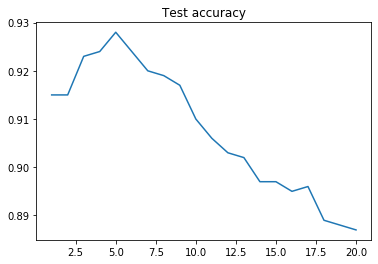

In [56]:
plt.plot(ks, accs);
plt.title("Test accuracy");
print(f"The best accuracy ({max(tab_test_metrics['accuracy'].values)}) on the TEST set is achieved with k = {ks[np.argmax(tab_test_metrics['accuracy'].values)]} ")

The minimum loss (0.07199999999999995) on the TEST set is achieved with k = 5 


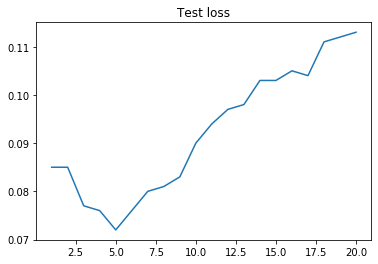

In [57]:
plt.plot(ks, loss_values);
plt.title("Test loss");
print(f"The minimum loss ({min(tab_test_metrics['loss'].values)}) on the TEST set is achieved with k = {ks[np.argmin(tab_test_metrics['loss'].values)]} ")

Train accuracy/loss

In [58]:
# Train accuracy/loss
ks = range(1, 21)
accs = []
loss_values = []

for k in tqdm_notebook(ks):
    preds = cl.predict(X_train, k)
    accuracy = accuracy_score(y_train, preds)

    accs.append(accuracy)
    loss_values.append(1-accuracy)

In [59]:
# Train accuracy/loss
tab_train_metrics = pd.DataFrame(data={"k": ks, "accuracy": accs, "loss": loss_values})
tab_train_metrics

,k,accuracy,loss
0,1,1.00000,0.00000
1,2,1.00000,0.00000
2,3,0.97267,0.02733
3,4,0.97300,0.02700
4,5,0.95933,0.04067
5,6,0.95733,0.04267
6,7,0.94867,0.05133
7,8,0.94667,0.05333
8,9,0.93767,0.06233
9,10,0.93733,0.06267


The best accuracy (1.0) on the TRAIN set is achieved with k = 1 


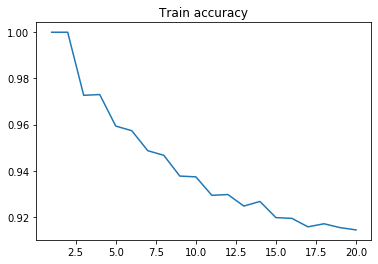

In [60]:
plt.plot(ks, accs);
plt.title("Train accuracy");
print(f"The best accuracy ({max(tab_train_metrics['accuracy'].values)}) on the TRAIN set is achieved with k = {ks[np.argmax(tab_train_metrics['accuracy'].values)]} ")

The minimum loss (0.0) on the TRAIN set is achieved with k = 1 


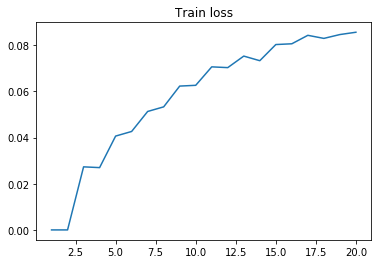

In [61]:
plt.plot(ks, loss_values);
plt.title("Train loss");
print(f"The minimum loss ({min(tab_train_metrics['loss'].values)}) on the TRAIN set is achieved with k = {ks[np.argmin(tab_train_metrics['loss'].values)]} ")

In [62]:
tab_train_metrics.rename(columns={"accuracy": "Train accuracy", "loss": "Train loss"}, inplace=True)

In [63]:
tab_test_metrics.rename(columns={"accuracy": "Test accuracy", "loss": "Test loss"}, inplace=True)

In [64]:
tab_train_test_accuracy_loss = pd.merge(tab_train_metrics, tab_test_metrics)

In [65]:
tab_train_test_accuracy_loss.round(5).to_csv("tab1.csv")

In [66]:
tab_train_test_accuracy_loss.round(5)

,k,Train accuracy,Train loss,Test accuracy,Test loss
0,1,1.00000,0.00000,0.91500,0.08500
1,2,1.00000,0.00000,0.91500,0.08500
2,3,0.97267,0.02733,0.92300,0.07700
3,4,0.97300,0.02700,0.92400,0.07600
4,5,0.95933,0.04067,0.92800,0.07200
5,6,0.95733,0.04267,0.92400,0.07600
6,7,0.94867,0.05133,0.92000,0.08000
7,8,0.94667,0.05333,0.91900,0.08100
8,9,0.93767,0.06233,0.91700,0.08300
9,10,0.93733,0.06267,0.91000,0.09000


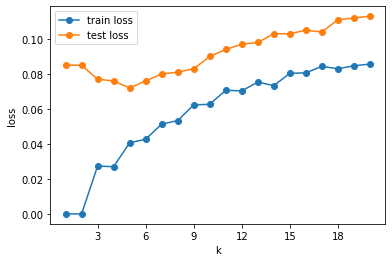

In [67]:
fig, ax = plt.subplots()
#plt.title("Empirical loss for train/test sets");
plt.plot(ks, tab_train_test_accuracy_loss["Train loss"], '-o', label="train loss");
plt.plot(ks, tab_train_test_accuracy_loss["Test loss"], '-o', label="test loss");
plt.legend();
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("k");
plt.ylabel("loss");

**??? Explain how ties are broken in Equation 1. ???**

### (b) Leave-One-Out Cross-Validation

In [68]:
ks = range(1, 21)
accs = []
loss_values = []

for k in tqdm_notebook(ks):
    preds = cl.predict(X_train, k+1, exclude_nearest=True) # !
    accuracy = accuracy_score(y_train, preds)

    accs.append(accuracy)
    loss_values.append(1-accuracy)

In [69]:
# LOOCV accuracy/loss
tab_loocv_metrics = pd.DataFrame(data={"k": ks, "accuracy": accs, "loss": loss_values})
tab_loocv_metrics

,k,accuracy,loss
0,1,0.91933,0.08067
1,2,0.91933,0.08067
2,3,0.92700,0.07300
3,4,0.92700,0.07300
4,5,0.92167,0.07833
5,6,0.92100,0.07900
6,7,0.91833,0.08167
7,8,0.91767,0.08233
8,9,0.91667,0.08333
9,10,0.91133,0.08867


In [70]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [71]:
tab_loocv_metrics.rename(columns={"accuracy": "LOOCV accuracy", "loss": "LOOCV loss"})

,k,LOOCV accuracy,LOOCV loss
0,1,0.91933,0.08067
1,2,0.91933,0.08067
2,3,0.92700,0.07300
3,4,0.92700,0.07300
4,5,0.92167,0.07833
5,6,0.92100,0.07900
6,7,0.91833,0.08167
7,8,0.91767,0.08233
8,9,0.91667,0.08333
9,10,0.91133,0.08867


The best LOOCV accuracy (0.927) (using only TRAIN set) is achieved with k = 3


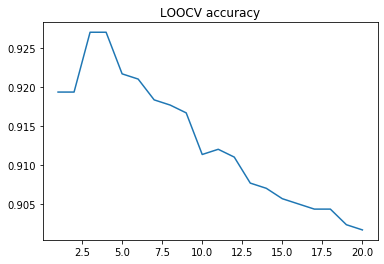

In [72]:
plt.plot(ks, accs);
plt.title("LOOCV accuracy");
print(f"The best LOOCV accuracy ({max(tab_loocv_metrics['accuracy'].values)}) (using only TRAIN set) is achieved with k = {ks[np.argmax(tab_loocv_metrics['accuracy'].values)]}")

The minimum LOOCV loss (0.07299999999999995) is achieved with k = 3 


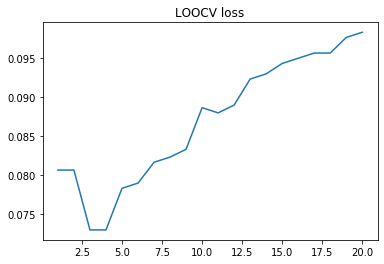

In [73]:
plt.plot(ks, loss_values);
plt.title("LOOCV loss");
print(f"The minimum LOOCV loss ({min(tab_loocv_metrics['loss'].values)}) is achieved with k = {ks[np.argmin(tab_loocv_metrics['loss'].values)]} ")

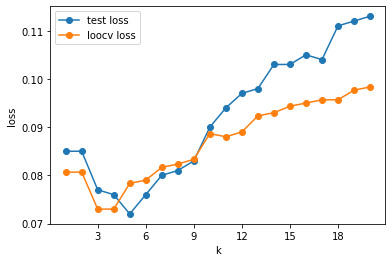

In [75]:
fig, ax = plt.subplots()
#plt.title("Empirical loss for train set using LOOCV and for test set");
plt.plot(ks, tab_test_metrics['Test loss'], '-o', label='test loss');
plt.plot(ks, tab_loocv_metrics['loss'], '-o', label='loocv loss');
plt.legend();
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('k');
plt.ylabel('loss');

# k=3 looks like the best value, chosen on cross-validation

### (c) LOOCV for both k and distance p.

In [6]:
ks = range(1, 21)
ps = range(1, 16, 1)
accs = []
loss_values = []
    
for p in tqdm_notebook(ps):
    cl = knn.KNN(algorithm='kd_tree', p=p) # 'brute'
    cl.fit(X_train, y_train)
    
    for k in tqdm_notebook(ks):
        preds = cl.predict(X_train, k+1, exclude_nearest=True) # !
        accuracy = accuracy_score(y_train, preds)

        accs.append(accuracy)
        loss_values.append(1-accuracy)

In [8]:
ksrange = list(ks) * 15

In [13]:
psrange = []
for i in range(1, 16, 1):
    lk = [i]*20
    psrange.extend(lk)

In [14]:
len(ksrange), len(psrange)

(300, 300)

In [19]:
len(loss_values), len(accs)

(300, 300)

In [20]:
# LOOCV accuracy/loss
tab_c = pd.DataFrame(data={"k": ksrange, "p": psrange, "accuracy": accs, "loss": loss_values})
tab_c

,k,p,accuracy,loss
0,1,1,0.91033,0.08967
1,2,1,0.91033,0.08967
2,3,1,0.91000,0.09000
3,4,1,0.91700,0.08300
4,5,1,0.90867,0.09133
...,...,...,...,...
295,16,15,0.92167,0.07833
296,17,15,0.92033,0.07967
297,18,15,0.91700,0.08300
298,19,15,0.91633,0.08367


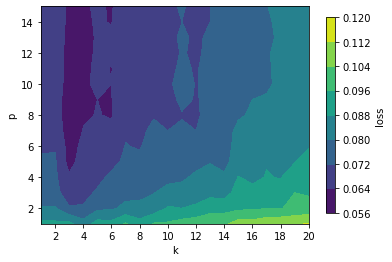

In [104]:
fig, ax = plt.subplots()
cf = plt.contourf(tab_c["k"].values.reshape(15, 20), tab_c["p"].values.reshape(15, 20), tab_c["loss"].values.reshape(15, 20),
            alpha=1, cmap=plt.cm.get_cmap("viridis"));
cbar = fig.colorbar(cf, ax=ax, shrink=0.9)
cbar.ax.set_ylabel('loss');
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.xlabel("k");
plt.ylabel("p");
#plt.legend();

In [ ]:
implrt 

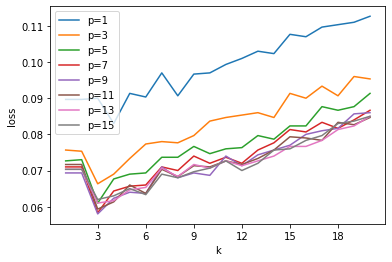

In [106]:
fig, ax = plt.subplots()
for i in [1, 3, 5, 7, 9, 11, 13, 15]:
    plt.plot(ks, tab_c[tab_c["p"]==i]["loss"], label=f"p={i}");

plt.legend();
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("k");
plt.ylabel("loss");


In [41]:
tab_c.iloc[tab_c["accuracy"].argmax()]

k          3.00000
p          8.00000
accuracy   0.94233
loss       0.05767
Name: 142, dtype: float64

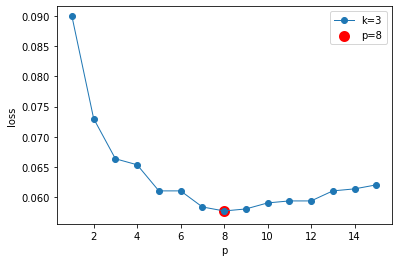

In [119]:
plt.plot(ps, tab_c[tab_c["k"]==3]["loss"], "-o", label="k=3", lw=1);
plt.scatter(np.argmin(tab_c[tab_c["k"]==3]["loss"].values)+1, np.min(tab_c[tab_c["k"]==3]["loss"].values), 
            c='r', lw=5, label='p=8')
plt.xlabel("p");
plt.ylabel("loss");
plt.legend();

### (d)

In [133]:
%%time
cl = knn.KNN(algorithm='kd_tree', p=2) # 'brute'
cl.fit(X_train, y_train)

k=3

preds = cl.predict(X_train, k+1, exclude_nearest=True) # !
accuracy = accuracy_score(y_train, preds)

print(preds, accuracy)

[6 3 4 ... 1 1 7] 0.927
Wall time: 11.3 s


In [134]:
%%time
cl = knn.KNN(algorithm='kd_tree', p=8) # 'brute'
cl.fit(X_train, y_train)

k=3

preds = cl.predict(X_train, k+1, exclude_nearest=True) # !
accuracy = accuracy_score(y_train, preds)

print(preds, accuracy)

[6 3 9 ... 3 1 7] 0.9423333333333334
Wall time: 1min 52s


In [135]:
112/11

10.181818181818182

In [ ]:
# For kdtree increasing p from 2 to 8 increases the time of LOOCV by a factor of 10

In [136]:
%%time
cl = knn.KNN(algorithm='brute', p=2) # 'brute'
cl.fit(X_train, y_train)

k=3

preds = cl.predict(X_train, k+1, exclude_nearest=True) # !
accuracy = accuracy_score(y_train, preds)

print(preds, accuracy)

[6 3 4 ... 1 1 7] 0.927
Wall time: 3min 59s


In [137]:
%%time
cl = knn.KNN(algorithm='brute', p=8) # 'brute'
cl.fit(X_train, y_train)

k=3

preds = cl.predict(X_train, k+1, exclude_nearest=True) # !
accuracy = accuracy_score(y_train, preds)

print(preds, accuracy)

[3 3 3 ... 6 6 3] 0.101
Wall time: 4min 15s


In [139]:
# For brute increasing p from 2 to 8 gives almost no increase in time, interesting..

### (e)

In [140]:
colnames = ["dig"] + [i for i in range(1, 28*28+1)]
trainf = pd.read_csv("MNIST_train.csv", names=colnames)

In [141]:
X_trainf = trainf.values[:, 1:]
y_trainf = trainf.values[:, 0]

In [142]:
X_trainf.shape

(60000, 784)

In [143]:
# Euclidean distance chosen, because for p=8 it is too long to wait

In [144]:
clf = knn.KNN(algorithm='kd_tree', p=2) # 'brute'
clf.fit(X_trainf, y_trainf)

In [ ]:
ks = range(1, 21)
accs = []
loss_values = []

for k in tqdm_notebook(ks):
    preds = clf.predict(X_trainf, k+1, exclude_nearest=True) # !
    accuracy = accuracy_score(y_trainf, preds)

    accs.append(accuracy)
    loss_values.append(1-accuracy)

In [ ]:
# LOOCV accuracy/loss for FULL train set
tab_e = pd.DataFrame(data={"k": ks, "LOOCV full train accuracy": accs, "LOOCV full train loss": loss_values})
tab_e

In [ ]:
fig, ax = plt.subplots()
plt.title("Empirical loss for full train set using LOOCV");
plt.plot(ks, tab_e['Test loss'], '-o', label='test loss');
plt.plot(ks, tab_e['loss'], '-o', label='loocv loss');
plt.legend();
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('k');
plt.ylabel('loss');